In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
# import results
minmax_df = pd.read_csv('./csv_results/minmax_scaler.csv')
no_df = pd.read_csv('./csv_results/no_scaler.csv')
standard_df = pd.read_csv('./csv_results/standard_scaler.csv')
robust_df = pd.read_csv('./csv_results/robust_scaler.csv')

momentum_df = pd.read_csv('./csv_results/momentum_times.csv')

# Compare by features

In [3]:
minmax_df.head()

,features,layers,momentum,mean_score,std_score
0,1,2,0.0,0.629019,0.170317
1,1,2,0.3,0.715028,0.001235
2,1,2,0.1,0.711570,0.008113
3,1,2,0.5,0.712265,0.003599
4,1,2,0.9,0.713298,0.003823


In [4]:
minmax_df.shape

(250, 5)

In [5]:
def get_series(l, m, df):
    momentum = df['momentum'] == m
    layers = df['layers'] == l
    selected = df[momentum & layers]
    x = selected.features.values
    y = selected.mean_score.values
    return x, y

In [6]:
# layers
#layers = [2, 3, 5, 8, 10]
layers = [2, 5, 10]

# plot properties
figsize = (10, 18)
cols = 1
rows = len(layers) // cols + 1


def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

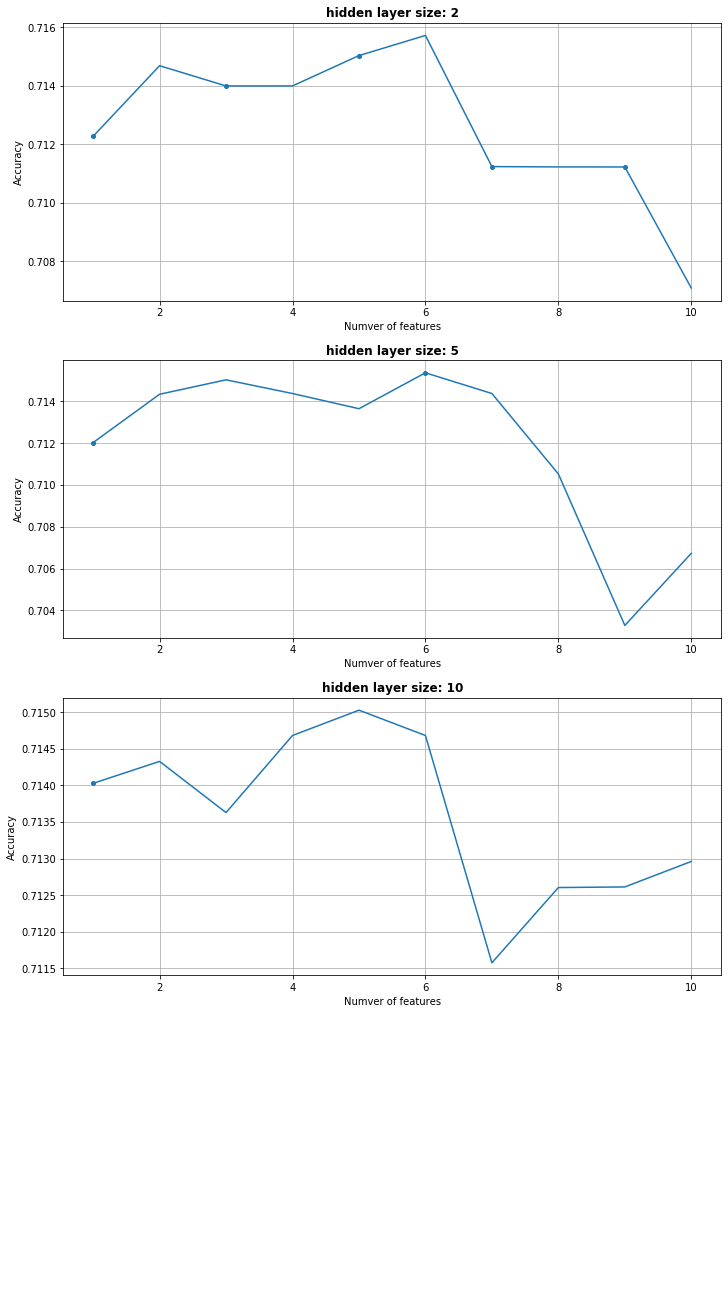

In [7]:
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, len(layers))
for ax, case in zip(axs, layers):
    x, y = get_series(case, 0.9, standard_df)
    ax.set_title('hidden layer size: %s' % str(case), weight='bold')
    ax.set_xlabel("Numver of features")
    ax.set_ylabel("Accuracy")
    ax.grid()
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)

fig1.savefig("./png_results/numbers_of_features.png", dpi=300)

# Momentum vs. Time

In [8]:
momentum_df.head()

,features,layers,momentum,mean_score,std_score,time
0,10,10,0.0,0.711233,0.005897,1743
1,10,10,0.1,0.714683,0.001857,1798
2,10,10,0.2,0.712608,0.007174,2038
3,10,10,0.3,0.712607,0.003759,1617
4,10,10,0.4,0.715028,0.001235,1420


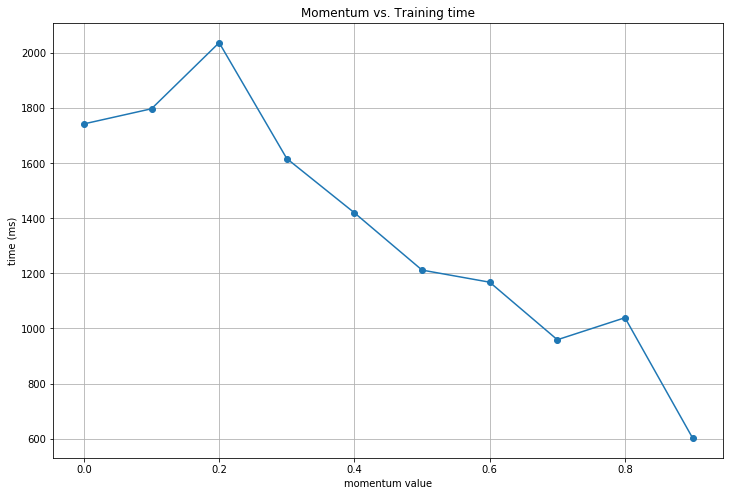

In [9]:
x_m = momentum_df.momentum.values[:10]
y_m = momentum_df.time.values[:10]

fig, ax = plt.subplots()
ax.plot(x_m, y_m, 'o', ls='-')

ax.set(xlabel='momentum value', ylabel='time (ms)',
       title='Momentum vs. Training time')
ax.grid()

fig.savefig("./png_results/momentum-training-time.png", dpi=300)
plt.show()

# Momentum vs. Accuracy

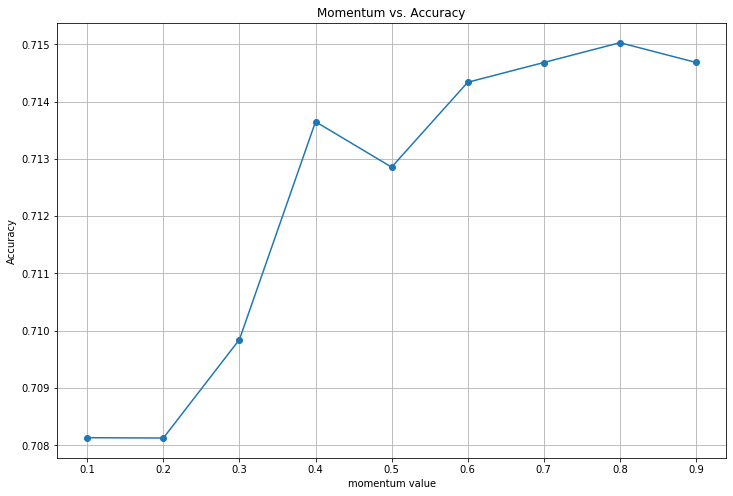

In [10]:
x_m = momentum_df.momentum.values[21:30]
y_m = momentum_df.mean_score.values[21:30]

fig, ax = plt.subplots()
ax.plot(x_m, y_m, 'o', ls='-')

ax.set(xlabel='momentum value', ylabel='Accuracy',
       title='Momentum vs. Accuracy')
ax.grid()

fig.savefig("./png_results/momentum-accuracy.png", dpi=300)
plt.show()

# Layer size vs. max accuracy vs. features number

In [11]:
def get_bests_by_scaler(df):
    s1 = df['layers'] == 2
    s2 = df['layers'] == 5
    s3 = df['layers'] == 10
    selected = df[s1 | s2 | s3]
    return selected.sort_values(by='mean_score', ascending=False)

In [12]:
sorted_standard_df = get_bests_by_scaler(standard_df)
sorted_standard_df.head()

,features,layers,momentum,mean_score,std_score
129,6,2,0.9,0.715717,0.005563
139,6,5,0.9,0.715365,0.009233
104,5,2,0.9,0.715028,0.001235
124,5,10,0.9,0.715028,0.001235
64,3,5,0.9,0.715028,0.001235
